In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_pickle('../data/data_full.pkl')

In [4]:
data_train = data.loc[data.index < '2023-10-30']
data_test = data.loc[data.index >= '2023-10-30']

In [5]:
X_train = data_train.drop('demand', axis=1)
X_test = data_test.drop('demand', axis=1)

y_train = data_train['demand']
y_train.name = 'Actual demand (train)'
y_test = data_test['demand']
y_test.name = 'Actual demand (test)'

# Model Implementation

In [9]:
from prophet import Prophet

In [10]:
prophet_multi_train = data_train.tz_convert(None).reset_index().rename(columns={
    'index':'ds',
    'demand':'y'
})

prophet_multi_test = data_test.tz_convert(None).reset_index().rename(columns={
    'index':'ds',
    'demand':'y'
}).drop('y', axis=1)

In [94]:
model.add_seasonality?

Signature:
model.add_seasonality(
    name,
    period,
    fourier_order,
    prior_scale=None,
    mode=None,
    condition_name=None,
)
Docstring:
Add a seasonal component with specified period, number of Fourier
components, and prior scale.

Increasing the number of Fourier components allows the seasonality to
change more quickly (at risk of overfitting). Default values for yearly
and weekly seasonalities are 10 and 3 respectively.

Increasing prior scale will allow this seasonality component more
flexibility, decreasing will dampen it. If not provided, will use the
seasonality_prior_scale provided on Prophet initialization (defaults
to 10).

Mode can be specified as either 'additive' or 'multiplicative'. If not
specified, self.seasonality_mode will be used (defaults to additive).
Additive means the seasonality will be added to the trend,
multiplicative means it will multiply the trend.

If condition_name is provided, the dataframe passed to `fit` and
`predict` should have a column

In [155]:
model = Prophet(changepoint_prior_scale=0.001, daily_seasonality=False, weekly_seasonality=False)

model.add_country_holidays(country_name='UK')

model.add_seasonality(name='daily', period=1, fourier_order=90, prior_scale=20)
model.add_seasonality(name='weekly', period=7, fourier_order=10)

for col in data_train.drop('demand', axis=1).columns:
    model.add_regressor(col)

In [156]:
model.fit(prophet_multi_train)

17:26:00 - cmdstanpy - INFO - Chain [1] start processing
17:26:12 - cmdstanpy - INFO - Chain [1] done processing


In [157]:
forecast = model.predict(prophet_multi_test)

## Prediction

In [158]:
y_pred = forecast['yhat']

## Prediction Statistics

In [159]:
y_pred_s = pd.Series(y_pred.to_numpy(), index=y_test.index, name='Predicted demand (test)')

### 24 Hours Forecast

In [160]:
y_pred_48 = y_pred_s.iloc[:48]
y_test_48 = y_test.iloc[:48]

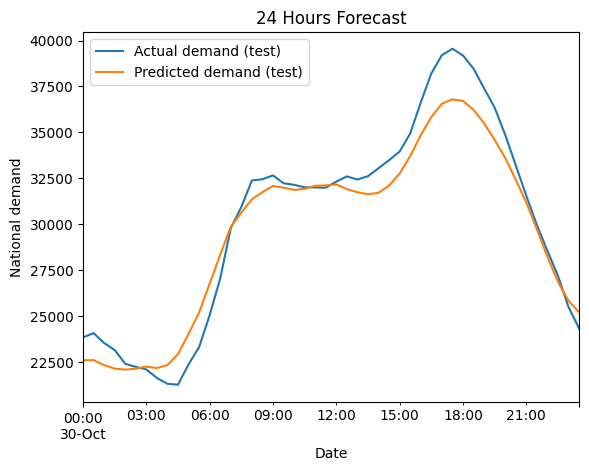

In [161]:
fig, ax = plt.subplots()
y_test_48.plot(ax=ax)
y_pred_48.plot(ax=ax)
ax.legend()
ax.set_title('24 Hours Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [162]:
print(f'RMSE for 24 hours: {mean_squared_error(y_test_48, y_pred_48, squared=False)}')

RMSE for 24 hours: 1265.9504521919364


### 7 Days Prediction

In [163]:
y_pred_336 = y_pred_s.iloc[:336]
y_test_336 = y_test.iloc[:336]

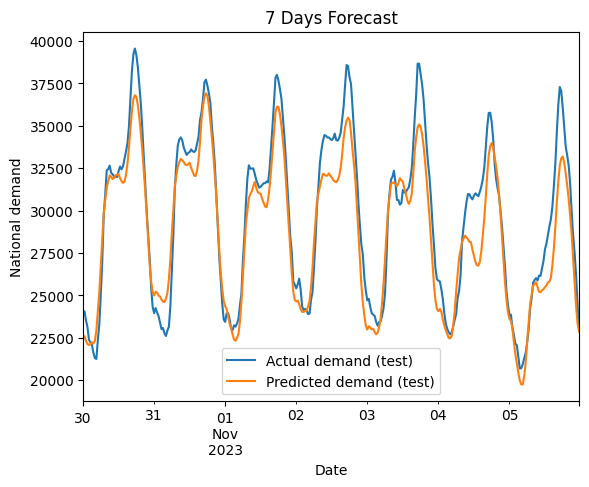

In [164]:
fig, ax = plt.subplots()
y_test_336.plot(ax=ax)
y_pred_336.plot(ax=ax)
ax.legend()
ax.set_title('7 Days Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [165]:
print(f'RMSE for 7 days: {mean_squared_error(y_test_336, y_pred_336, squared=False)}')

RMSE for 7 days: 1677.3308135257885


### 28 Days Prediction

In [166]:
y_pred_1344 = y_pred_s.iloc[:1344]
y_test_1344 = y_test.iloc[:1344]

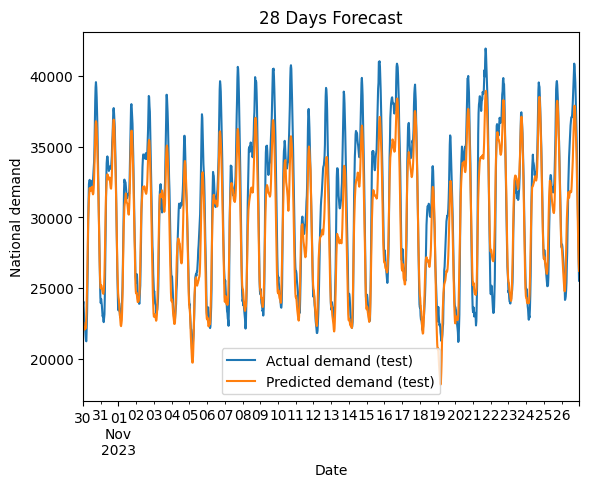

In [167]:
fig, ax = plt.subplots()
y_test_1344.plot(ax=ax)
y_pred_1344.plot(ax=ax)
ax.legend()
ax.set_title('28 Days Forecast')
ax.set_xlabel("Date")
ax.set_ylabel("National demand")
plt.show()

In [168]:
print(f'RMSE for 28 days: {mean_squared_error(y_test_1344, y_pred_1344, squared=False)}')

RMSE for 28 days: 2079.262310560325
